<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/3ekstraksi_dan_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

load korpus

In [73]:
url1 = '/content/drive/MyDrive/dataisear(preputama).csv'
url2 = '/content/drive/MyDrive/dataisear(preptambah).csv'
df = pd.read_csv(url1)

In [74]:
temp=[]
for senten in df.dokumen:
  temp.append(ast.literal_eval(senten))
df.dokumen=temp

pilih model

In [67]:
pakai_model=2

load model

In [ ]:
from gensim.models import word2vec
!pip install glove-python-binary
from glove import Glove
from glove import Corpus

     |████████████████████████████████| 948 kB 6.8 MB/s 


In [75]:
if pakai_model == 1:#load model word2vec
  model = gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/korpusblogspertiga(preptambah).w2v')

elif pakai_model == 2:#load model glove
  model=Glove.load('/content/drive/MyDrive/korpusblogspertiga(preputama).glove')

cek model

In [76]:
if pakai_model == 1:
  print(model.wv.vectors.shape)
elif pakai_model == 2:
  print(model.word_vectors.shape)

(1048781, 100)


In [ ]:
if pakai_model == 1:
  print(model.wv["moment"])
elif pakai_model == 2:
  print(model.word_vectors[model.dictionary['moment']])

ambil conntoh model wor embedding

In [77]:
import array
count=0
simpanang=[]
simpankat=[]

if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      simpanang.append(model.wv[word])
      simpankat.append(word)
      if count<24:
        count+=1
      else :
        break
    if count<24:
      count+=1
    else :
      break

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      simpanang.append(model.word_vectors[model.dictionary[word]])
      simpankat.append(word)
      if count<24:
        count+=1
      else :
        break
    if count<24:
      count+=1
    else :
      break

has_vec=ekstrak

In [78]:
dfang=pd.DataFrame(simpanang)
dfkat=pd.DataFrame(simpankat)
result = pd.concat([dfkat, dfang], axis=1)
result.shape

(25, 101)

In [79]:
result.to_excel("preputama,glove.xlsx")

average base ekstraksi fitur

In [ ]:
import array
kumpul=[]
temp=array.array('i',(0,)*100)

if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.wv[word])
    temp=temp/len(senten)
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.word_vectors[model.dictionary[word]])
    temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

In [ ]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(7516, 100)
(7516,)


klasifikasi svm

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [ ]:
def klasifikasi(y_pred):
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

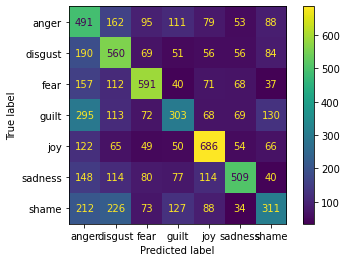

0.45915380521554017
(0.47104464780964544, 0.4581743320155933, 0.45745628540625066, None)


In [ ]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
# acc10k=cross_val_score(clf, X, y, cv=10)
# np.mean(acc10k)
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

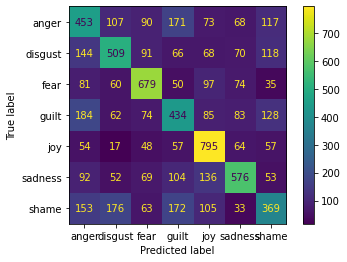

0.5075838211814795
(0.5042923342962513, 0.506657232981501, 0.5033495702478372, None)


In [ ]:
clf = svm.SVC(kernel='rbf', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

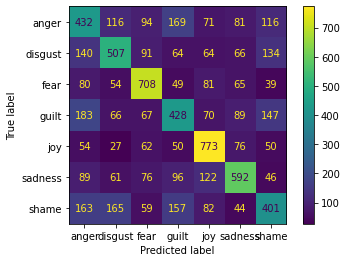

0.5110431080361895
(0.5069028791644624, 0.5101455584023582, 0.507404184632631, None)


In [ ]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)